In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.패키지 로드 및 데이터 로드

In [2]:
import numpy as np
import pandas as pd

from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

import matplotlib.pyplot as plt

In [3]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 48.3 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 109 (delta 7), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (109/109), 1.27 MiB | 5.46 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-04-20 02:07:27--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loca

In [4]:
total_data = pd.read_csv('/content/drive/MyDrive/YGL/Final_Project/Final_Project_Sharing/민경태/DATA/thema_0.1_447120_1650419750.8618314.csv', index_col= 0)
print('전체 데이터 갯수 :', len(total_data))

전체 데이터 갯수 : 447120


In [5]:
total_data

,data,key
0,여사친과 숲관련된 곳 가서 보고 싶어,자연
1,홀로유명한 전시/행사 알려줘,예술
2,커플끼리 근방에 액티비티근처 갈만한 곳 추천해줘,수상
3,남자친구와 유명한 마린스포츠 알려줄래?,수상
4,남사친과 여기 카트 근처 추천해줘,육상
...,...,...
447115,혼자서 여기 숲길근처 일출 언제야?,자연
447116,아이와가까운 해수욕장관련된 곳 가서 언제 가게 열어?,수상
447117,홀로커플스냅근처 언제 도착해?,사진
447118,여친이랑 이쪽에 등산일출 언제야?,육상


# 2.데이터전처리

## 훈련데이터와 테스트데이터를 분리

In [6]:
# total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)

In [7]:
total_data['key'].unique(), total_data['key'].nunique()

(array(['자연', '예술', '수상', '육상', '겨울', '역사', '봄', '가을', '사진', '공중', '도보',
        '사계절', '여름'], dtype=object), 13)

In [8]:
total_data['key'].nunique()

13

In [9]:
total_data.drop_duplicates(subset='data', inplace=True)

In [10]:
total_data.reset_index(drop=True, inplace=True)

In [11]:
total_data.isnull().sum()

data    0
key     0
dtype: int64

In [12]:
total_data

,data,key
0,여사친과 숲관련된 곳 가서 보고 싶어,자연
1,홀로유명한 전시/행사 알려줘,예술
2,커플끼리 근방에 액티비티근처 갈만한 곳 추천해줘,수상
3,남자친구와 유명한 마린스포츠 알려줄래?,수상
4,남사친과 여기 카트 근처 추천해줘,육상
...,...,...
437813,혼자서 여기 숲길근처 일출 언제야?,자연
437814,아이와가까운 해수욕장관련된 곳 가서 언제 가게 열어?,수상
437815,홀로커플스냅근처 언제 도착해?,사진
437816,여친이랑 이쪽에 등산일출 언제야?,육상


In [13]:
train_data, test_data = train_test_split(total_data, test_size=0.25, random_state=42, stratify=total_data['key'])
print('훈련용 데이터의 갯수 :', len(train_data))
print('테스트용 데이터의 갯수 :', len(test_data))

훈련용 데이터의 갯수 : 328363
테스트용 데이터의 갯수 : 109455


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_

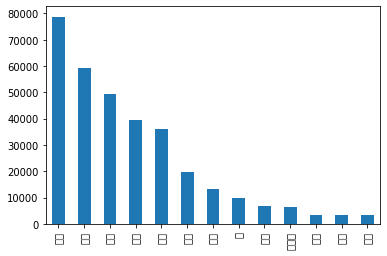

In [14]:
train_data['key'].value_counts().plot(kind='bar') 

In [15]:
print(train_data.groupby('key').size().reset_index(name='count'))

    key  count
0    가을   6583
1    겨울   3290
2    공중   3275
3    도보  19707
4     봄   9862
5   사계절   6571
6    사진  13126
7    수상  49261
8    여름   3283
9    역사  39401
10   예술  36129
11   육상  59106
12   자연  78769


## 데이터 정제 2

In [16]:
train_data['data'].replace('', np.nan, inplace=True)

In [17]:
print(train_data.isnull().sum())

data    0
key     0
dtype: int64


## Test data 정제

In [18]:
#1. 중복 제거
test_data.drop_duplicates(subset='data', inplace=True)

#2. 정규표현식을 이용하여 한글 외 문자 제거
# test_data['data'] = test_data['data'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")

#3. 공백을 null 변경
test_data['data'].replace('', np.nan, inplace = True)

#4. Null값 제거
test_data['data'].dropna(how='any')

#5. 테스트 갯수 반환
print('테스트용 리뷰의 갯수 :', len(test_data))

테스트용 리뷰의 갯수 : 109455


## 불용어 제거

In [19]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [20]:
# from konlpy.tag import Okt
from konlpy.tag import Mecab
# from konlpy.tag import Komoran

In [21]:
mecab = Mecab()
# okt = Okt()
# komoran = Komoran()

In [22]:
train_data['tokenized'] = train_data['data'].apply(mecab.morphs) # 형태소 분석완료
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

test_data['tokenized'] = test_data['data'].apply(mecab.morphs) # 형태소 분석완료
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [23]:
train_data.head()

,data,key,tokenized
226911,나 혼자서가까운 도보근처 배고픈데 알려줘,도보,"[나, 혼자, 서, 가까운, 도보, 근처, 배고픈, 데, 알려줘]"
429243,가족이랑 근처에 북촌근처 언제 가게 닫혀?,역사,"[가족, 이랑, 근처, 북촌, 근처, 언제, 가게, 닫, 혀, ?]"
383929,남자친구와 근방에 커플스냅근처 얼마나 걸릴까?,사진,"[남자, 친구, 근방, 커플, 스냅, 근처, 얼마나, 걸릴까, ?]"
311127,남사친과 가까운 계곡근처 어느 쪽이야?,자연,"[남, 사친, 가까운, 계곡, 근처, 어느, 쪽, 야, ?]"
364207,남사친과 근처에 전시관근처 어느 위치에 있어?,예술,"[남, 사친, 근처, 전시관, 근처, 어느, 위치, 있, 어, ?]"


In [24]:
test_data.head()

,data,key,tokenized
392321,친구들이랑가까운 마을관광근처 얼마나 걸려?,도보,"[친구, 이랑, 가까운, 마을, 관광, 근처, 얼마나, 걸려, ?]"
39879,여친이랑 가까운 코스모스 보고 싶어,자연,"[여친, 이랑, 가까운, 코스모스, 보, 고, 싶, 어]"
216488,둘이서 이쪽에 우정스냅 한식 추천해줘,사진,"[둘, 서, 이쪽, 우정, 스냅, 한식, 추천, 해, 줘]"
9321,부모님과 유명한 코스모스 보고싶어,자연,"[부모, 님, 유명, 코스모스, 보, 고, 싶, 어]"
135866,부모님이랑 나 사진근처 알려줘,사진,"[부모, 님, 이랑, 나, 사진, 근처, 알려줘]"


## 단어와 길이 분포 확인

In [25]:
x_train = train_data['tokenized'].values
y_train = train_data['key'].values
x_test = test_data['tokenized'].values
y_test = test_data['key'].values

In [26]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[list(['나', '혼자', '서', '가까운', '도보', '근처', '배고픈', '데', '알려줘'])
 list(['가족', '이랑', '근처', '북촌', '근처', '언제', '가게', '닫', '혀', '?'])
 list(['남자', '친구', '근방', '커플', '스냅', '근처', '얼마나', '걸릴까', '?']) ...
 list(['아이', '나', '레이싱', '관련', '된', '곳', '서', '음식점', '알려줘'])
 list(['애', '이랑', '이쪽', '수영장', '어딨', '습니까', '?'])
 list(['혼자', '길', '전시관', '관련', '된', '곳', '서', '맛집', '추천', '해', '줘'])]
['도보' '역사' '사진' ... '육상' '수상' '예술']
[list(['친구', '이랑', '가까운', '마을', '관광', '근처', '얼마나', '걸려', '?'])
 list(['여친', '이랑', '가까운', '코스모스', '보', '고', '싶', '어'])
 list(['둘', '서', '이쪽', '우정', '스냅', '한식', '추천', '해', '줘']) ...
 list(['친구', '랑', '근처', '액티비티', '관련', '된', '곳', '서', '언제', '도착', '해', '?'])
 list(['남자', '친구', '카트', '맛있', '곳', '알려줘'])
 list(['여자', '친구', '근처', '해바라기', '근처', '갈만', '곳', '추천', '해', '줘'])]
['도보' '자연' '사진' ... '수상' '육상' '자연']


## 정수 인코딩

In [27]:
vocab_size = 10000
t = Tokenizer(vocab_size, oov_token='OOV')
t.fit_on_texts(x_train)

In [28]:
threshold = 2
total_cnt = len(t.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in t.word_counts.items():
    total_freq = total_freq + value

    if (value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합 (vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀단어의 수 : %s' %(threshold-1, rare_cnt))
print('단어 집합에서 희귀단어의 비율 :', (rare_cnt/total_cnt)*100)
print('전체 등장 빈도에서 희귀단어 등장 빈도 비율 :', (rare_freq/total_freq)* 100)

단어 집합 (vocabulary)의 크기 : 291
등장 빈도가 1번 이하인 희귀단어의 수 : 10
단어 집합에서 희귀단어의 비율 : 3.436426116838488
전체 등장 빈도에서 희귀단어 등장 빈도 비율 : 0.00030204828000117195


In [29]:
# 전체 단어 갯수 중 빈도수 2이하인 단어 갯수는 제거.
# 0번 패딩 토큰과 1번 OOV토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 283


In [30]:
original_vocab_size = vocab_size + rare_cnt -2
print('원래 vocab size :', original_vocab_size)

원래 vocab size : 291


In [31]:
x_train[0]

['나', '혼자', '서', '가까운', '도보', '근처', '배고픈', '데', '알려줘']

In [32]:
t = Tokenizer(vocab_size, oov_token='OOV')
t.fit_on_texts(x_train)

x_train = t.texts_to_sequences(x_train)
x_test = t.texts_to_sequences(x_test)

In [33]:
print(x_train[:3])
print(x_test[:3])

[[16, 21, 4, 20, 91, 3, 113, 67, 12], [33, 6, 3, 146, 3, 17, 99, 54, 55, 5], [53, 13, 25, 40, 84, 3, 70, 117, 5]]
[[13, 6, 20, 57, 82, 3, 70, 128, 5], [47, 6, 20, 180, 63, 22, 23, 14], [49, 4, 24, 195, 84, 125, 10, 9, 11]]


## 패딩(Padding)

데이터의 최대 길이 : 22
데이터의 평균 길이 : 10.082527568575022


Text(0, 0.5, 'number of samples')

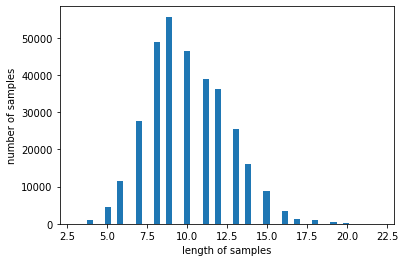

In [34]:
print('데이터의 최대 길이 :', max(len(l) for l in x_train))
print('데이터의 평균 길이 :', sum(map(len, x_train))/len(x_train))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')

In [35]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if (len(s) <= max_len):
            cnt = cnt + 1

    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율 : %s' % (max_len, (cnt/len(nested_list))*100))

In [36]:
max_len = 15
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 15 이하인 샘플의 비율 : 98.09966409126486


In [37]:
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

print(x_train.shape)
print(x_test.shape)

(328363, 15)
(109455, 15)


In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [39]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 3.학습

## 모델 정의

In [40]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [41]:
embedding_dim = 100
hidden_size = 128

model_gru = Sequential()
model_gru.add(Embedding(vocab_size, 100))
model_gru.add(GRU(hidden_size, return_sequences = True))
model_gru.add(GRU(hidden_size))
model_gru.add(Dense(len(set(total_data['key'])), activation='softmax'))
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         28300     
                                                                 
 gru (GRU)                   (None, None, 128)         88320     
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 13)                1677      
                                                                 
Total params: 217,369
Trainable params: 217,369
Non-trainable params: 0
_________________________________________________________________


In [42]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('hyerim_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [43]:
type(x_train), type(x_train),

(numpy.ndarray, numpy.ndarray)

In [44]:
epoch = 5

model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])
history_gru = model_gru.fit(x_train, y_train, epochs=epoch, callbacks=[es, mc], batch_size=60)

Epoch 1/5
5473/5473 [==============================] - 84s 14ms/step - loss: 0.0450 - acc: 0.9845
Epoch 2/5
5473/5473 [==============================] - 76s 14ms/step - loss: 0.0013 - acc: 0.9996
Epoch 3/5
5473/5473 [==============================] - 76s 14ms/step - loss: 8.7398e-04 - acc: 0.9997
Epoch 4/5
5473/5473 [==============================] - 77s 14ms/step - loss: 7.3102e-04 - acc: 0.9997
Epoch 5/5
5473/5473 [==============================] - 77s 14ms/step - loss: 7.1434e-04 - acc: 0.9997


In [45]:
model_gru.evaluate(x_test, y_test)[1] # [1]은 acc를 의미하고 acc를 저장한다는 의미

3421/3421 [==============================] - 23s 6ms/step - loss: 0.0012 - acc: 0.9995


0.9995340704917908

# 4.예측하기

In [46]:
def sentiment_predict(new_sentence):
    new_sentence = mecab.morphs(new_sentence) # 형태소 분석 tokenizer

    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거

    encoded = t.texts_to_sequences([new_sentence]) # 텍스트 > 정수 시퀀스
    pad_new = pad_sequences(encoded, maxlen=max_len) # 패딩
    score = model_gru.predict(pad_new)
    print(np.argmax(score))
    print(le.inverse_transform([np.argmax(score)]))


In [47]:
# 가을 : 0, 겨울 : 1, 공중 : 2, 도보 : 3, 봄 : 4, 사계절 : 5, 사진 : 6, 수상 : 7, 여름 : 8, 역사 : 9, 예술 : 10, 육상 : 11, 자연 : 12
sentiment_predict('해수욕 하고 싶어')

3
['도보']


In [48]:
for i in range(total_data['key'].nunique()):
    print("{} : {}".format(le.inverse_transform([i])[0] , i))

가을 : 0
겨울 : 1
공중 : 2
도보 : 3
봄 : 4
사계절 : 5
사진 : 6
수상 : 7
여름 : 8
역사 : 9
예술 : 10
육상 : 11
자연 : 12


# 5.모델 저장

In [49]:
from time import time

# 실수로 모델이 덮어씌워지는 것을 방지하기 위해 만든 장치
tt = time()

In [50]:
path = '/content/drive/MyDrive/YGL/Final_Project/Final_Project_Sharing/민경태/Result/'

# 모델 저장
model_save_name = path + 'model_catbot_thema' + '_e_' + str(epoch) + '_dl_' + str(len(total_data)) + '_' +  str(tt) + '.h5'
model_gru.save(model_save_name)

In [51]:
# 단어장 저장
import json

word_index = t.word_index
json = json.dumps(word_index)
f = open(path + "thema_wordIndex_v2.json", "w")
f.write(json)
f.close()

In [52]:
# 불러오기
# new_model = tf.keras.models.load_model(model_save_name)
# test_loss, test_acc = new_model.evaluate(x,  y, verbose=2)